In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
catalyst_features = pd.read_excel('features.xlsx')
catalyst_features.replace([np.inf, -np.inf], np.nan, inplace=True)
catalyst_properties = pd.read_excel('properties.xlsx')
catalyst_properties.replace([np.inf, -np.inf], np.nan, inplace=True)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X = np.array(catalyst_features)
y = np.array(catalyst_properties)
X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:,:], test_size=0.2, random_state=22)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 16) (135, 6)
(34, 16) (34, 6)


In [22]:
def generate_net(X_train, y_train):
    model = Sequential([Input(shape=(X_train.shape[1],))])

    model.add(Dense(30, activation='relu'))

    # Hidden layer
    model.add(Dense(20, activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(10, activation='relu'))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='linear'))
    return model

def generate_net_less_complex(X_train, y_train):
    model = Sequential([Input(shape=(X_train.shape[1],))])

    model.add(Dense(25, activation='relu'))

    # Hidden layer
    model.add(Dense(15, activation='relu'))
    model.add(Dense(10, activation='relu'))

    # Output layer
    model.add(Dense(y_train.shape[1], activation='linear'))
    return model

In [6]:
# opt = SGD(learning_rate=0.01, momentum=0.9)

In [12]:
#new_model = tf.keras.models.load_model('models/NN_mse_basic.keras')

### writing the code to plot the learning curves for NN models

In [23]:
# Set up list to collect results
def run_learning_curve(X,y,model_net_function,metric):
    results_train_mse = []
    results_val_mse = []
    results_test_mse = []

    # Construct training sizes (values closer at lower end)
    train_sizes = [60,70,80,90,100,110,120,130,140,X.shape[0]]

    # Loop through training sizes
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X[:train_size,:], y[:train_size,:], test_size=0.2, random_state=22)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print('Train size: ', train_size, '\n')
        print('Starting the model training...\n')
        model = model_net_function(X_train_scaled, y_train)
        model.compile(optimizer='adam',
                  loss=metric,
                  metrics=[metric])
        history = model.fit(X_train_scaled, y_train, 
                            validation_split=0.2, 
                            epochs=150, 
                            batch_size=16, 
                            verbose=0)
        y_pred_all = model.predict(X_test_scaled)
        residual = np.array(y_test)-np.array(y_pred_all)
        if metric =='mse':
            mse_test = np.sum(np.mean(residual**2,axis=0))
        elif metric == 'mae':
            mse_test = np.sum(np.mean(residual,axis=0))
        results_train_mse.append(history.history[metric][-1])
        results_val_mse.append(history.history[f'val_{metric}'][-1])
        results_test_mse.append(mse_test)
        print('\nTraining completed.\n')
        print('----------------------------------------')
    return results_train_mse, results_val_mse, results_test_mse

In [12]:
results_train_mse, results_val_mse, results_test_mse = run_learning_curve(X,y,generate_net, metric='mse')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/st

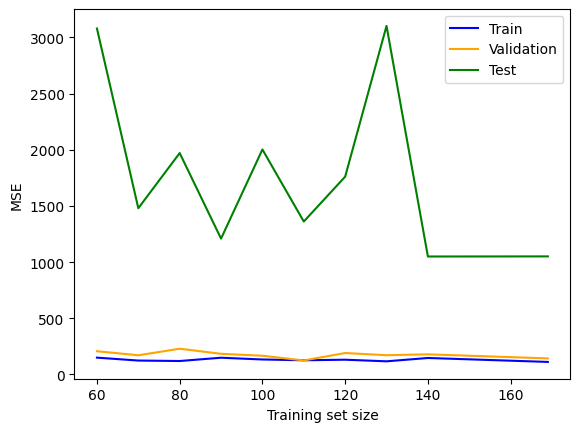

In [15]:
train_sizes = [60,70,80,90,100,110,120,130,140,X.shape[0]]
fig = plt.figure()
plt.plot(train_sizes, results_train_mse, color='b', label='Train')
plt.plot(train_sizes, results_val_mse, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mse, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.savefig('error_plots/Learning_Curve_NN_mse.png')
plt.show()
fig.clear()

### Performing learning curve analysis with mae loss function

In [17]:
results_train_mae, results_val_mae, results_test_mae = run_learning_curve(X,y,generate_net, metric='mae')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step



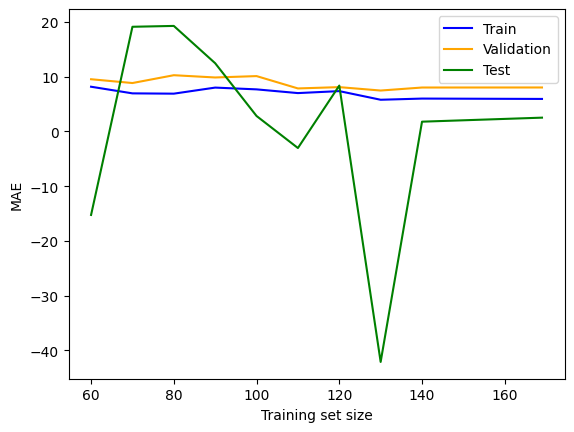

In [18]:
fig = plt.figure()
plt.plot(train_sizes, results_train_mae, color='b', label='Train')
plt.plot(train_sizes, results_val_mae, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mae, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MAE')
plt.savefig('error_plots/Learning_Curve_NN_mae.png')
plt.show()
fig.clear()

### Lets work with MAE models and try to reduce the complexity. The learning curves are a bit weird to understand at this point. I suspect that because the validation errors are higher (in both mae and mse), I coud reduce the complexity of the model and see how it performs.

In [20]:
results_train_mae, results_val_mae, results_test_mae = run_learning_curve(X,y,generate_net_less_complex, metric='mae')

Train size:  60 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Training completed.

----------------------------------------
Train size:  70 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

Training completed.

----------------------------------------
Train size:  80 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

Training completed.

----------------------------------------
Train size:  90 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Training completed.

----------------------------------------
Train size:  100 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

Training completed.

----------------------------------------
Train size:  110 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

Training completed.

----------------------------------------
Train size:  120 

Starting the model training...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step



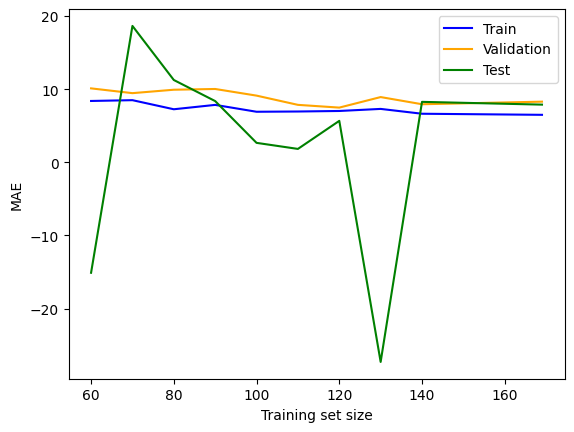

In [21]:
fig = plt.figure()
plt.plot(train_sizes, results_train_mae, color='b', label='Train')
plt.plot(train_sizes, results_val_mae, color='orange', label='Validation')
plt.plot(train_sizes, results_test_mae, color='g', label='Test')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('MAE')
plt.savefig('error_plots/Learning_Curve_NN_mae_less_complex_net.png')
plt.show()
fig.clear()